#                                                 InstaBot part-2

## Loading the Important packages and set the driver path 

In [11]:
# Packages
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.select import Select

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import re

# Disable Chrome Browser Notification
option = Options()
option.add_argument("--disable-infobars")
option.add_argument("start-maximized")
option.add_argument("--disable-extensions")
option.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 1 
})


# Create driver session
#driver = webdriver.Chrome(options=option,executable_path = '/Users/mukeshbisht/Desktop/Selenium/chromedriver')
driver = webdriver.Chrome(options=option,executable_path = "C:\\Users\\aiims\\Desktop\\Selenium\\chromedriver_window\\chromedriver.exe")

# Login on the Instagram
## please enter your user_name and password. 

In [12]:
driver.get('https://instagram.com/')
username = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, "username")))
password = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, "password")))
username.clear()
password.clear()

username.send_keys("sample_Name")
password.send_keys("sample_Password")
btn = driver.find_elements_by_tag_name("button")
btn[1].click()

time.sleep(10)

# Handling the POP-UP menu that comes after the login on Instagram.

In [5]:
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "sqdOP")))
driver.find_element_by_xpath('//button[contains(@class, "sqdOP")]').click()

## Question 1: Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
### 1. From the list of instagram handles you obtained when you searched ‘food’ in a previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
### 2. Now Find the number of posts these handles have done in the previous 3 days.
### 3. Depict this information using a suitable graph


In [13]:
def get_follower_count(user_handle): 
    time.sleep(2)
    base_url = "https://instagram.com"
    driver.get(base_url+user_handle[1])
    time.sleep(5)
    tag = driver.find_element_by_partial_link_text("followers")
    data = BeautifulSoup(tag.get_attribute('outerHTML'),'html.parser').find('span').get('title')
    follower_count = int(data.replace(',',''))
    return [follower_count,user_handle[0],user_handle[1]]

### we search the food and get all the profiles. we stored all the profiles into the handles list here.

In [20]:
search_input =  driver.find_element_by_xpath("//input[@placeholder='Search']")
search_input.clear()
search_input.send_keys('food')
user_ids = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'fuqBx')))
html_content = user_ids[0].get_attribute('outerHTML')
data = BeautifulSoup(html_content,'html.parser')

handles=[]
for i in data.find_all('a'):
    word=i['href'].split('/')[1]
    if word!="explore":
        handles.append([word,i['href']])        
  


In [21]:
for j in (handles):
    print(j)

['foodi.club_', '/foodi.club_/']
['foodie_incarnate', '/foodie_incarnate/']
['delhifoodwalks', '/delhifoodwalks/']
['thefoodranger', '/thefoodranger/']
['foodporn', '/foodporn/']
['food_of_jodhpur', '/food_of_jodhpur/']
['food', '/food/']
['yourfoodlab', '/yourfoodlab/']
['wanderingg_foodie', '/wanderingg_foodie/']
['bilaspurexplorer', '/bilaspurexplorer/']
['dilsefoodie', '/dilsefoodie/']
['thegutlessfoodie', '/thegutlessfoodie/']
['gajabfood', '/gajabfood/']
['food_lovechennai', '/food_lovechennai/']
['sound_of_the_heart_', '/sound_of_the_heart_/']
['lovedietfood_kwt', '/lovedietfood_kwt/']
['woktowalk', '/woktowalk/']
['foodbible', '/foodbible/']
['foodie_.lovers_', '/foodie_.lovers_/']
['foodtravelstories', '/foodtravelstories/']
['foodbeast', '/foodbeast/']
['food._product', '/food._product/']
['licious_foods', '/licious_foods/']
['mamas_cookery_', '/mamas_cookery_/']
['the_fresh_made_', '/the_fresh_made_/']
['fit.byellie', '/fit.byellie/']
['dogs_infood', '/dogs_infood/']
['carin

### we get only top 10 handles and count the follwers of their profile. we fetch only top 5 users with followers. 

In [22]:
# Only 10 user id with there profile link
handles = handles[:10]
user_id_followers = []
    
for user_handle in handles:
    arr=get_follower_count(user_handle)
    user_id_followers.append(arr)

In [23]:
# TOP FIVE USER HANDLES WITH FOLLOWERS, PROFILE LINK
user_id_followers.sort(reverse=True)
user_id_followers = user_id_followers[:5]
for user_id in user_id_followers:
    print(user_id)

[1719679, 'yourfoodlab', '/yourfoodlab/']
[996044, 'thefoodranger', '/thefoodranger/']
[914137, 'foodporn', '/foodporn/']
[788325, 'foodi.club_', '/foodi.club_/']
[459768, 'foodie_incarnate', '/foodie_incarnate/']


### Drawing the Bar graph

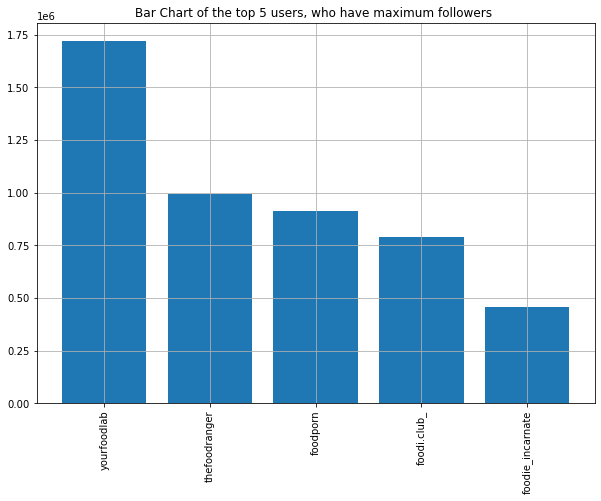

In [24]:
counts = [i[0] for i in user_id_followers]
user_ids = [i[1] for i in user_id_followers]

plt.figure(figsize=(10, 7))
plt.title('Bar Chart of the top 5 users, who have maximum followers ')
plt.bar(user_ids,counts)
plt.xticks(rotation=90)
plt.grid()
plt.show()
plt.show()


#driver.get("https://instagram.com")
# Depict this information using a suitable graph.


## Answer 1.2 :


In [25]:
def post_date_check(user_url):
    base_url = "https://instagram.com"
    driver.get(base_url+user_url)
    time.sleep(2)
    post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='v1Nh3 kIKUG  _bz0w']")))
    post.click()
    no_of_posts = 0
    try:
        while True:
            time_of_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//a[@class='c-Yi7']/time")))
            date_of_post = BeautifulSoup(time_of_post.get_attribute('outerHTML'),'html.parser').find('time').get('title')
            date_of_post = date_of_post.replace(',', '')
            post_date = datetime.strptime(date_of_post, '%b %d %Y').date()
            current_date = datetime.today().strftime('%Y-%m-%d')
            current_date = datetime.strptime(current_date, '%Y-%m-%d').date()
            difference_in_date = (current_date-post_date).days
            next_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div/a[@class=' _65Bje  coreSpriteRightPaginationArrow']")))
            next_post.click()
            if difference_in_date>3:
                break
                
            no_of_posts+=1
            time.sleep(2)
    except:
        return no_of_posts
        
    return no_of_posts;  

In [26]:
user_handles = []
post_counts = []

for user_detail in user_id_followers:
    user_handles.append(user_detail[1])
    post_count = post_date_check(user_detail[2])
    post_counts.append(post_count)
    time.sleep(3)

## Answer 1.3 :

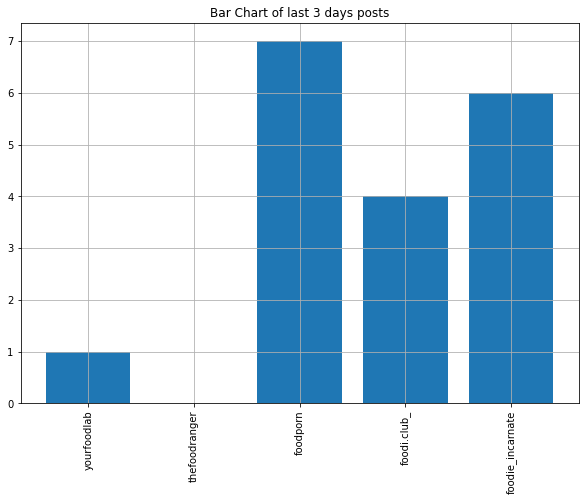

In [27]:
driver.get("https://instagram.com")
# Depict this information using a suitable graph.
plt.figure(figsize=(10, 7))
plt.title('Bar Chart of last 3 days posts')
plt.bar(user_handles,post_counts)
plt.xticks(rotation=90)
plt.grid()
plt.show()

## Question 2 : Your friend also needs a list of hashtags that he should use in his posts.
### 1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
### 2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
### 3. Create a csv file with two columns : the word and its frequency
### 4. Now, find the hashtags that were most popular among these bloggers
### 5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.


In [28]:
def post_check(user_url):
    base_url = "https://instagram.com"
    driver.get(base_url+user_url)
    time.sleep(2)
    post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='v1Nh3 kIKUG  _bz0w']")))
    post.click()
    no_of_posts = 1
    total_likes = 0
    post_for_like = 0
    texts = ""
    try:
        while True:
            content = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='C4VMK']/span")))
            text = BeautifulSoup(content.get_attribute('outerHTML'),'html.parser').find('span').text
            texts = texts + str(" ") + str(text)
            like_data = driver.find_element_by_xpath("//section[@class='EDfFK ygqzn']")
            likes = BeautifulSoup(like_data.get_attribute('outerHTML'),'html.parser').find('span').text.replace(',','')
            if "views" not in likes:
                total_likes += int(likes)
                post_for_like+=1
            else:
                button_like = driver.find_element_by_xpath('//span[contains(.," views")]')
                driver.execute_script("arguments[0].click();", button_like)
                like_data = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//section[@class='EDfFK ygqzn']//div[contains(.,' likes')]")))
                like_html_data = BeautifulSoup(like_data.get_attribute('outerHTML'),'html.parser')
                likes = int(like_html_data.find(class_ = 'vJRqr').find('span').text.replace(",",''))
                total_likes +=likes
                post_for_like+=1


            next_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div/a[@class=' _65Bje  coreSpriteRightPaginationArrow']")))
            driver.execute_script("arguments[0].click();", next_post)
            
            
            if no_of_posts==10:
                break
            no_of_posts+=1
            time.sleep(2)
    except:
        print("Failed")
        return [texts,total_likes,post_for_like]
        
    return [texts,total_likes,post_for_like]        


characters_not_required = "[-/\"/=/+/“/”/*/-/👀/📷/😂/❤️/💪/🤦/🙄/😩/🤦🏻/🤤/🌍/🍜/🇫🇷/👉/😱/🍕/🙌/🍞/🍩/🍫/🍌/🍓/☕️/🍻/✈️/🍰/🍣/🌎/🍨/🍔/🍫/♂️/♀️/🍗/🥩/🍖/🌶/😋/👨‍/😮/😍/🍳/@/,/?/🔥/👏/😉/)/🥓/(/|/0-9/./:/!/💕/🌮/>/</🍴/🍅/🧀/🎉/🔒]"


In [29]:
def get_word_frequency(content,words_dictionary,hastag_dictionary):
    words = content.split(" ")
    for word in words:
        word = re.sub(characters_not_required, "", word)
        if word!="":
            if word[0]=="#":
                hastag_dictionary[word] = hastag_dictionary.get(word,0)+1
                continue
            words_dictionary[word] = words_dictionary.get(word,0)+1

In [30]:
user_handles = []
post_contents = []
for user_detail in user_id_followers:
    user_handles.append(user_detail[1])
    post_content = post_check(user_detail[2])
    post_contents.append(post_content)
    time.sleep(3)

driver.get("https://instagram.com")


In [31]:
#print(*user_handles)
print("top 5 user")
for i in range(len(post_contents)):
    print()
    print(user_handles[i])
    print("*******************************")
    print()
    print(post_contents[i][0])
    print()
    print("****************************************************************************************************************************************************************************")
    

top 5 user

yourfoodlab
*******************************

 Rains + Vada Pav = Pure Love ❤️ OUT TOMORROW AT 6:30 pm on the YouTube channel! Restaurant style Chilli Chicken by Chef @sanjyotkeerHere my way of cooking delicious restaurant like chilli chicken at home. The recipe is super simple and requires basic ingredients, no fancy sauces or anything & cooks up quickly. I personally love to have chilli chicken my self, the dry version as a starter or chilli chicken with gravy with some egg fried rice or some crispy butter naan, yes you heard it right. This combination tastes amazing! You could also prep a roll with some roomali roti and enjoy this appetizer. Do try the recipe & let me know in the comments! Cheers!....#recipe #foodiesofinstagram #chilli #chillichicken #chicken #chickenrecipes #chickenlovers #chickenofinstagram #foodporn #streetfood #streetfoodindia #recipeoftheday #indianfood #sanjyotkeer #yourfoodlab My latest Restaurant style Chilli Chicken recipe video is out now in You

In [23]:
words_dictionary = {}
hastag_dictionary = {}
for content in post_contents:
    get_word_frequency(content[0],words_dictionary,hastag_dictionary)
    

In [24]:
words = [ key for key,value in words_dictionary.items()]
word_frequency = [ value for key,value in words_dictionary.items()]
#print(len(words))
for i in range(len(words)):
    print(words[i],end=" : ")
    print(word_frequency[i])

Baingan : 1
Bharta : 1
with : 26
aartipaartipicsFans : 1
love : 3
this : 4
eggplant : 1
so : 3
much : 4
they : 1
say : 1
you : 10
should : 1
make : 1
a : 23
DOUBLE : 1
batchSubscribe : 1
to : 41
discoveryplus : 5
stream : 5
more : 6
episodes : 2
httpslinksdiscoverypluscomBtJwKzXsBgbSave : 1
the : 46
recipe : 11
httpsfoodtvcomgpYFj : 1
Head : 6
our : 13
IGTV : 5
for : 22
clickable : 5
links : 4
Chocolate : 1
Peanut : 1
Butter : 2
S'mores : 1
Bars : 1
wolfiesmom : 1
bakes : 1
up : 2
sweet : 1
and : 37
gooey : 1
campout : 1
classic : 3
— : 1
no : 1
fire : 1
necessary : 2
Watch : 2
Valerie's : 1
Sundays : 1
at : 11
ac : 1
subscribe : 1
entire : 1
series : 1
httpslinksdiscoverypluscomYOsCeygb : 1
httpsfoodtvcomcpwKz : 1
get : 4
heads : 1
into : 3
future : 2
as : 3
four : 1
chefs : 2
cook : 3
mystery : 1
ingredients : 2
we : 5
might : 1
be : 7
noshing : 1
on : 25
in : 45
is : 8
allnew : 2
tonight : 1
c : 3
Crab : 1
Cakes : 1
inagartenIna's : 1
crispy : 2
golden : 1
crab : 1
cakes : 1
can : 7

In [26]:
# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}


# Dataframe created using Pandas which will help us to create the CSV file
words_df = pd.DataFrame(columns)


# Create the CSV file without Index values
words_df.to_csv(r'WordFrequency.csv', index=False)

In [28]:
# Now, find the hashtags that were most popular among these bloggers
hastag_with_frequency = [[value,key] for key,value in hastag_dictionary.items()]
hastag_with_frequency.sort(reverse=True)

# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]]
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

# Pie graph to get the idea of which hashtag has been used for most of the time.


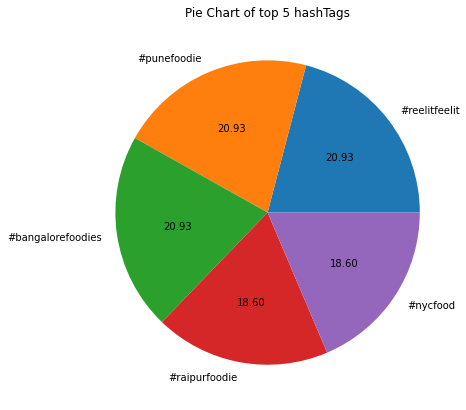

In [29]:
plt.figure(figsize=(10, 7))
plt.title('Pie Chart of top 5 hashTags')
plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")
plt.show()

  
## Question 3 : You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:
### 1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
### 2. Calculate the average likes for a handle.
### 3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
### 4. Create a bar graph to depict the above obtained information.


In [31]:
# Find out the likes of the top 10 posts of the 5 handles obtained earlier.
"""
Answer: As I mentioned earlier I will be using previous variables/lists/dictionaries so here I have used two lists 1
1. user_handles 
2. post_contents which have the likes count

NOTE: I won't be able to state anything from the bar graphs as it depends on lot of factors. 
"""
print("---------------------------------")
print("Total Likes for 10 Posts")
print("---------------------------------")
for i in range(5):
    print(user_handles[i],post_contents[i][1])
    
# Calculate the average likes for a handle.
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
# To store the average_likes for each handle
average_likes_list = []
for i in range(5):
    average_likes = post_contents[i][1]/post_contents[i][2]
    average_likes_list.append(average_likes)
    print(user_handles[i],format(average_likes,".0f"))


    
    
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")
avg_followers = []
for i in range(5):
    avg_followers_count = int(user_id_followers[i][0]/average_likes_list[i])
    avg_followers.append(avg_followers_count)
    print(user_id_followers[i][1],avg_followers_count,':',int(average_likes_list[i]))


    


---------------------------------
Total Likes for 10 Posts
---------------------------------
foodnetwork 85390
foodzeee 508547
foodtalkindia 574
food 9907
foodabove.all 13850
---------------------------------
Average Likes
---------------------------------
foodnetwork 8539
foodzeee 50855
foodtalkindia 574
food 991
foodabove.all 1385
---------------------------------
Ratio Avg Followers : Avg Likes
---------------------------------
foodnetwork 1330 : 8539
foodzeee 13 : 50854
foodtalkindia 531 : 574
food 127 : 990
foodabove.all 35 : 1385


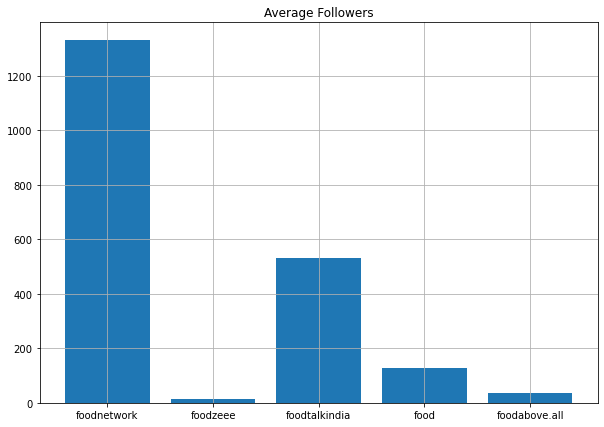

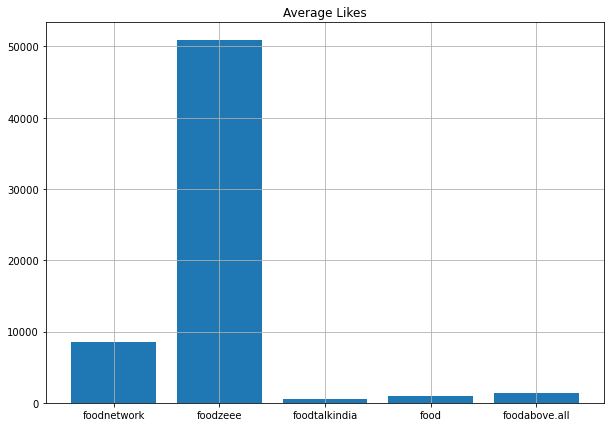

In [38]:
# Create a bar graph to depict the above obtained information.
plt.figure(figsize=(10, 7))
plt.bar(user_handles,avg_followers)
plt.title('Average Followers')
plt.grid()
plt.show()



plt.figure(figsize=(10, 7))
plt.bar(user_handles,average_likes_list)
plt.title('Average Likes')
plt.grid()
plt.show()

